#Exploratory Analysis of Geolocational Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
#!pip install geopy
import geopy

In [7]:
df = pd.read_csv('food_coded.csv')
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [9]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


Filling NaN data with the mode 

In [13]:
for column in df.columns:
    df[column] = df[column].fillna(df[column].mode()[0])
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,3.0,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,none,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


Creating a new dataframe with essential columns

In [15]:
df1=df[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports', 'veggies_day']]

In [16]:
print(df.columns.tolist())

['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day', 'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons', 'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1', 'cuisine', 'diet_current', 'diet_current_coded', 'drink', 'eating_changes', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out', 'employment', 'ethnic_food', 'exercise', 'father_education', 'father_profession', 'fav_cuisine', 'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day', 'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal', 'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food', 'italian_food', 'life_rewarding', 'marital_status', 'meals_dinner_friend', 'mother_education', 'mother_profession', 'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out', 'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food', 'tortilla_calories', 'turkey_calories', 'type_sports', 'veggies_day', 'vitamins', 'waffle_calories', 'we

In [17]:
df1.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


In [18]:
df1.shape

(125, 11)

#Removal of Outliers - Using Boxplots





<Axes: >

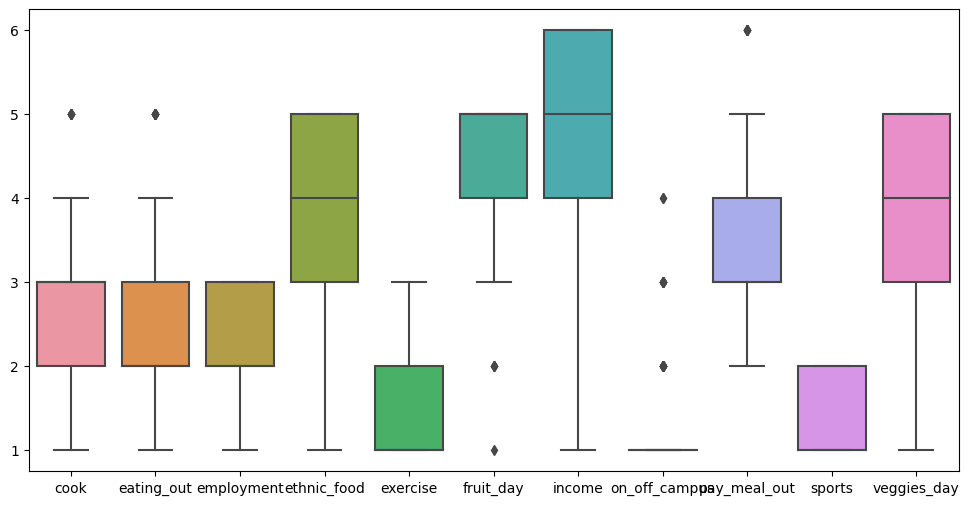

In [22]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(data=df1, ax = ax)

In [23]:
max_threshold = df1.quantile(0.95)
max_threshold

cook             5.0
eating_out       5.0
employment       3.0
ethnic_food      5.0
exercise         3.0
fruit_day        5.0
income           6.0
on_off_campus    3.0
pay_meal_out     6.0
sports           2.0
veggies_day      5.0
Name: 0.95, dtype: float64

In [24]:
df1 = df1.drop(df1[df1['cook'] > 4].index)
df1 = df1.drop(df1[df1['eating_out'] > 4].index)
df1 = df1.drop(df1[df1['fruit_day'] < 3].index)
df1 = df1.drop(df1[df1['on_off_campus'] > 1].index)
df1 = df1.drop(df1[df1['pay_meal_out'] > 5].index)

In [25]:
df1.shape

(75, 11)

In [26]:
df1.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
7,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4


<Axes: >

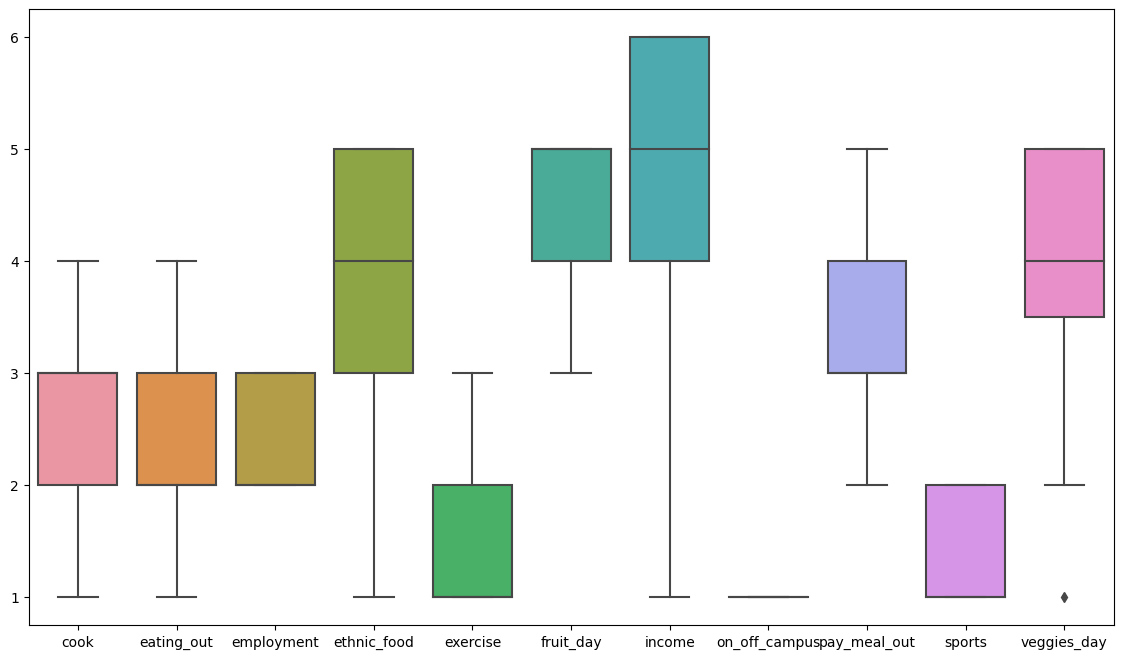

In [27]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df1, ax = ax)

In [28]:
df1 = df1.reset_index()

In [29]:
df1 = df1.drop(df1[df1['veggies_day'] < 2].index)

In [30]:
df1.head()

,index,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
3,4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
4,7,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4


In [31]:
df1['index']

0       0
1       1
2       3
3       4
4       7
     ... 
70    117
71    119
72    121
73    122
74    124
Name: index, Length: 74, dtype: int64

In [32]:
df1 = df1.drop(["index"], axis = 'columns')

In [33]:
df1.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
3,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
4,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4


<Axes: >

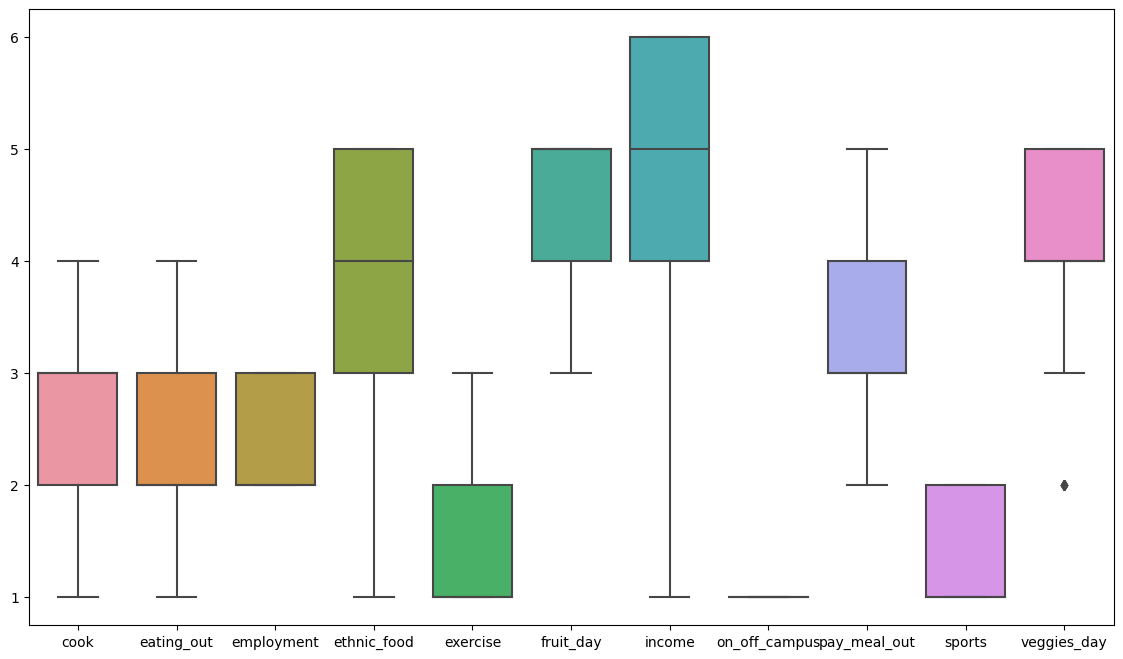

In [34]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df1, ax = ax)

In [35]:
df1 = df1.drop(df1[df1['veggies_day'] < 3].index)

<Axes: >

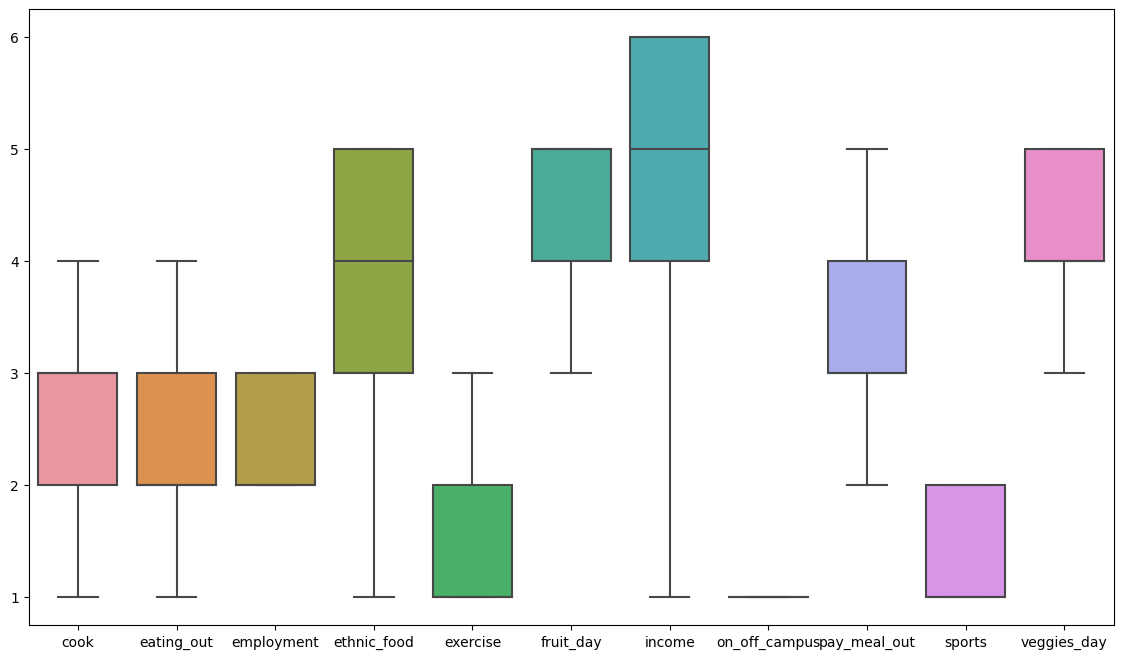

In [36]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data=df1, ax = ax)

In [37]:
df1.shape

(66, 11)

In [38]:
df1.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
3,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
4,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4


In [39]:
df1 = df1.reset_index()

In [40]:
df1 = df1.drop(["index"], axis = 'columns')

The new refined dataset

In [41]:
df1.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
3,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
4,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4


#KMeans Clustering 

In [42]:
X = df1.copy()

In [43]:
X.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
3,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4
4,3.0,2,2.0,2,2.0,5,5.0,1.0,5,2.0,4


Elbow Method to find the number of clusters

In [45]:
from sklearn.cluster import KMeans

In [48]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [49]:
print(os.getenv('OMP_NUM_THREADS'))  

1


In [50]:
import warnings
warnings.filterwarnings('ignore', message='KMeans is known to have a memory leak on Windows with MKL')


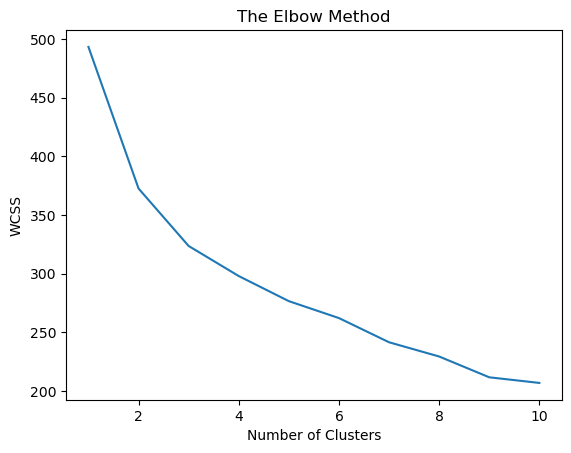

In [51]:
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set environment variable to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'

# Suppress specific warnings
warnings.filterwarnings('ignore', message='KMeans is known to have a memory leak on Windows with MKL')

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


C:\Users\dethe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dethe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dethe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dethe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

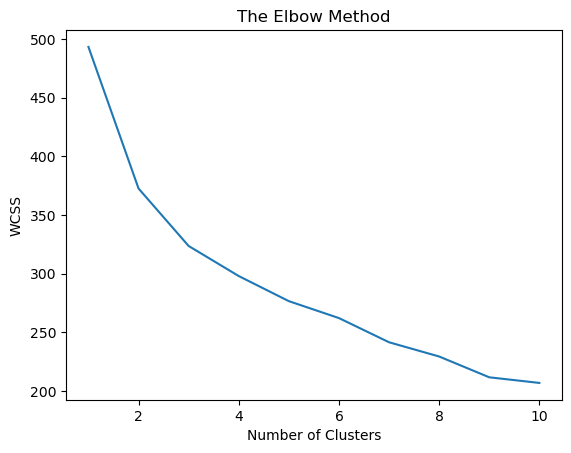

In [47]:
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Set environment variable to avoid memory leak warning
os.environ['OMP_NUM_THREADS'] = '1'

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


C:\Users\dethe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dethe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dethe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\dethe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

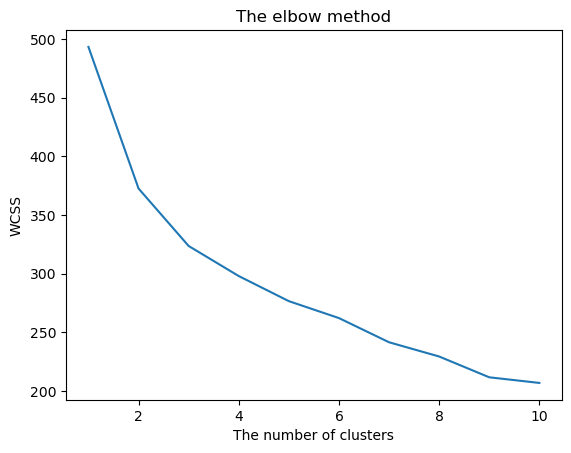

In [46]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
kmeans=KMeans(n_clusters=3, init='k-means++',random_state=42)
Y_kmeans=kmeans.fit_predict(X) 
print(Y_kmeans) 

C:\Users\dethe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 1 1 1 0 1 1 2 0 1 1 0 0 2 0 1 0 1 1 2 0 2 1 1 0 1 1 0 1 2 0 1 1 1 2 1 1
 0 2 1 0 1 0 2 2 0 1 1 1 0 1 2 1 1 1 1 1 0 1 2 2 2 2 2 2 0]


#Foursquare API - To get geolocational data

In [53]:
import json, requests
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20200316'
LIMIT = 10000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    13.0306, 77.5649,
    30000, 
    LIMIT)
data = requests.get(url).json()

In [54]:
data

{'meta': {'code': 400,
  'errorType': 'invalid_auth',
  'errorDetail': 'Missing access credentials. See https://developer.foursquare.com/docs/api/configuration/authentication for details.',
  'requestId': '66cde4d85feb3240aa001d71'},
 'response': {}}

Converting the Json Response to a Dataframe

In [55]:
dataframe = pd.json_normalize(data['response']['groups'][0]['items'])

KeyError: 'groups'

In [ ]:
dataframe.head(10)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.venuePage.id,venue.location.neighborhood
0,e-0-4f1869c7e4b0ebf9e4ae9134-0,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,#26/1,"Dr. Rajkumar Rd, Rajajinagar",13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",2398,560055,IN,Bangalore,Karnātaka,India,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],NaN,NaN
1,e-0-531ed995498ef21f6f904159-1,0,"[{'summary': 'This spot is popular', 'type': '...",531ed995498ef21f6f904159,"PVR Gold Class, Orion",NaN,NaN,13.010923,77.555010,"[{'label': 'display', 'lat': 13.01092312496633...",2438,NaN,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",0,[],NaN,NaN
2,e-0-4e1d8edd1838f4ab743f26ae-2,0,"[{'summary': 'This spot is popular', 'type': '...",4e1d8edd1838f4ab743f26ae,O.G. Variar & Sons,NaN,NaN,12.991578,77.554561,"[{'label': 'display', 'lat': 12.99157795337298...",4486,NaN,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",0,[],NaN,NaN
3,e-0-4db972aba86ee4fa7d37df76-3,0,"[{'summary': 'This spot is popular', 'type': '...",4db972aba86ee4fa7d37df76,Sheraton Bangalore Hotel,"26/1 Dr. Rajkumar Road, Malleswaram-Rajajinagar",NaN,13.012513,77.555255,"[{'label': 'display', 'lat': 13.0125129, 'lng'...",2268,560055,IN,Bangalore,Karnātaka,India,"[26/1 Dr. Rajkumar Road, Malleswaram-Rajajinag...","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,NaN
4,e-0-4d90bab2d4ec8cfacfb5a989-4,0,"[{'summary': 'This spot is popular', 'type': '...",4d90bab2d4ec8cfacfb5a989,Corner House,Nehru Circle,Near Sheshadripuram College,12.988304,77.577130,"[{'label': 'display', 'lat': 12.98830366372137...",4891,NaN,IN,Bangalore,Karnātaka,India,"[Nehru Circle (Near Sheshadripuram College), B...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],NaN,NaN
5,e-0-4b7965c1f964a52085f72ee3-5,0,"[{'summary': 'This spot is popular', 'type': '...",4b7965c1f964a52085f72ee3,Infinitea,Cunningham Road,Vasanth Nagar,12.987157,77.594835,"[{'label': 'display', 'lat': 12.98715675640287...",5824,560052,IN,Bangalore,Karnātaka,India,"[Cunningham Road (Vasanth Nagar), Bangalore 56...","[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",0,[],NaN,NaN
6,e-0-4d0f41eec3dc3704e9633174-6,0,"[{'summary': 'This spot is popular', 'type': '...",4d0f41eec3dc3704e9633174,Asha Sweet Center,NaN,NaN,12.999371,77.571322,"[{'label': 'display', 'lat': 12.99937057262444...",3545,NaN,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d1c7941735', 'name': 'S...",0,[],NaN,NaN
7,e-0-4b69572ff964a520509f2be3-7,0,"[{'summary': 'This spot is popular', 'type': '...",4b69572ff964a520509f2be3,Taj West End,Racecourse Rd.,NaN,12.984572,77.584893,"[{'label': 'display', 'lat': 12.98457206660889...",5563,NaN,IN,Bangalore,Karnātaka,India,"[Racecourse Rd., Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",0,[],NaN,NaN
8,e-0-4f93d338e4b01cffa1f2a8a2-8,0,"[{'summary': 'This spot is popular', 'type': '...",4f93d338e4b01cffa1f2a8a2,Central,26/1 Dr. Rajkumar Road,NaN,13.011261,77.555034,"[{'label': 'display', 'lat': 13.01126087435231...",2404,560055,IN,Bangalore,Karnātaka,India,"[26/1 Dr. Rajkumar Road, Bangalore 560055, Kar...","[{'id': '4bf58dd8d48988d1f6941735', 'name': 'D...",0,[],NaN,NaN
9,e-0-4d57a3817c0b37048f4ad808-9,0,"[{'summary': 'This spot is popular', 'type': '...",4d57a3817c0b37048f4ad808,Natural Ice Cream,Basweshwarnagar,NaN,12.985484,77.543158,"[{'label': 'display', 'lat': 12.98548406229445...",5548,NaN,IN,Bangalore,Karnātaka,I

Finding the number of restaurants and other amenities like gyms, parks in the given location (using lat and lng)

In [ ]:
resta=[]
oth=[]
for lat,lng in zip(dataframe['venue.location.lat'],dataframe['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
      CLIENT_ID, 
      CLIENT_SECRET, 
      VERSION, 
      lat,lng,
      1000, 
      100)
    res = requests.get(url).json()
    venue = res['response']['groups'][0]['items']
    dataframe = pd.json_normalize(venue)
    df=dataframe['venue.categories']

    g=[]
    for i in range(0,df.size):
      g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
      if i>1:
        co+=1
    resta.append(co)
    oth.append(len(g)-co)
dataframe

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups
0,e-0-4b647dd2f964a520cdb72ae3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b647dd2f964a520cdb72ae3,My Tea House,"293, Banashankari 3rd Stage",100ft Ring Rd,12.923086,77.556032,"[{'label': 'display', 'lat': 12.92308552482382...",0,560085,IN,Bangalore,Karnātaka,India,"[293, Banashankari 3rd Stage (100ft Ring Rd), ...","[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",0,[]
1,e-0-548ff23c498e3cbb402f3df6-1,0,"[{'summary': 'This spot is popular', 'type': '...",548ff23c498e3cbb402f3df6,Vinny's,Opp. BDA Complex,Bsk 2 Nd Stage,12.924439,77.564848,"[{'label': 'display', 'lat': 12.92443909349938...",968,NaN,IN,Bangalore,Karnātaka,India,"[Opp. BDA Complex (Bsk 2 Nd Stage), Bangalore,...","[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",0,[]
2,e-0-4f72ac4fe4b0a60ba514108e-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f72ac4fe4b0a60ba514108e,Kavali,Opp. Chennamanakere Bus Stand,NaN,12.928059,77.556010,"[{'label': 'display', 'lat': 12.92805908794264...",553,560085,IN,Bangalore,Karnātaka,India,"[Opp. Chennamanakere Bus Stand, Bangalore 5600...","[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0,[]
3,e-0-4fe3013be4b0abb74945f5e7-3,0,"[{'summary': 'This spot is popular', 'type': '...",4fe3013be4b0abb74945f5e7,Ibaco,"#31,21st Main Rd, Banashankari",Opp. BDA Complex,12.925808,77.564340,"[{'label': 'display', 'lat': 12.92580773987106...",950,560070,IN,Bangalore,Karnātaka,India,"[#31,21st Main Rd, Banashankari (Opp. BDA Comp...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[]
4,e-0-4d98411c744f3704907fea57-4,0,"[{'summary': 'This spot is popular', 'type': '...",4d98411c744f3704907fea57,Casablanca,"Sri Sai Plaza, No. 97, 22nd Main Rd, BSK 2nd S...",NaN,12.926261,77.564343,"[{'label': 'display', 'lat': 12.92626050831024...",968,560070,IN,Bangalore,Karnātaka,India,"[Sri Sai Plaza, No. 97, 22nd Main Rd, BSK 2nd ...","[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[]
5,e-0-4f00421f775bec6b446e0218-5,0,"[{'summary': 'This spot is popular', 'type': '...",4f00421f775bec6b446e0218,Poonam Sweet Centre,BSK BDA Complex,NaN,12.924890,77.564926,"[{'label': 'display', 'lat': 12.92488962738543...",985,NaN,IN,NaN,NaN,India,"[BSK BDA Complex, India]","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[]
6,e-0-4d1ca0a6c50e6ea8b41bd4b8-6,0,"[{'summary': 'This spot is popular', 'type': '...",4d1ca0a6c50e6ea8b41bd4b8,Anna Kuteera,Kathriguppe Main Road,NaN,12.926094,77.550367,"[{'label': 'display', 'lat': 12.92609373090117...",699,NaN,IN,Bangalore,Karnātaka,India,"[Kathriguppe Main Road, Bangalore, Karnātaka, ...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[]
7,e-0-4fc1f35ce4b01d437e407d17-7,0,"[{'summary': 'This spot is popular', 'type': '...",4fc1f35ce4b01d437e407d17,Hara,NaN,NaN,12.924391,77.565137,"[{'label': 'display', 'lat': 12.92439074016553...",998,NaN,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[]
8,e-0-55f9259f498e9521e9f1a78e-8,0,"[{'summary': 'This spot is popular', 'type': '...",55f9259f498e9521e9f1a78e,Smacznego,"#2470, 21th Main","25th Cross, Bsk 2nd Stage",12.924022,77.564215,"[{'label': 'display', 'lat': 12.92402228255212...",893,560070,IN,Bangalore,Karnātaka,India,"[#2470, 21th Main (25th Cross, Bsk 2nd Stage),...","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[]
9,e-0-5221f3dc11d2bc869d73a4c0-9,0,"[{'summary': 'This spot is popular', 'type': '...",5221f3dc11d2bc869d73a4c0,Roving Feast,Next to Polar Bear,Opp to Banashankari BDA Complex,12.924468,77.565019,"[{'label': 'display', 'lat': 12.92446794292586...",987,NaN,IN,Bangalore,Karnātaka,India,[Next to Polar Be

In [ ]:
dataframe['restaurant'] = pd.Series(resta)
dataframe['others']=pd.Series(oth)

In [ ]:
dataframe

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,restaurant,others
0,e-0-4b647dd2f964a520cdb72ae3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b647dd2f964a520cdb72ae3,My Tea House,"293, Banashankari 3rd Stage",100ft Ring Rd,12.923086,77.556032,"[{'label': 'display', 'lat': 12.92308552482382...",0,560085,IN,Bangalore,Karnātaka,India,"[293, Banashankari 3rd Stage (100ft Ring Rd), ...","[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",0,[],33,30
1,e-0-548ff23c498e3cbb402f3df6-1,0,"[{'summary': 'This spot is popular', 'type': '...",548ff23c498e3cbb402f3df6,Vinny's,Opp. BDA Complex,Bsk 2 Nd Stage,12.924439,77.564848,"[{'label': 'display', 'lat': 12.92443909349938...",968,NaN,IN,Bangalore,Karnātaka,India,"[Opp. BDA Complex (Bsk 2 Nd Stage), Bangalore,...","[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",0,[],35,31
2,e-0-4f72ac4fe4b0a60ba514108e-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f72ac4fe4b0a60ba514108e,Kavali,Opp. Chennamanakere Bus Stand,NaN,12.928059,77.556010,"[{'label': 'display', 'lat': 12.92805908794264...",553,560085,IN,Bangalore,Karnātaka,India,"[Opp. Chennamanakere Bus Stand, Bangalore 5600...","[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0,[],22,6
3,e-0-4fe3013be4b0abb74945f5e7-3,0,"[{'summary': 'This spot is popular', 'type': '...",4fe3013be4b0abb74945f5e7,Ibaco,"#31,21st Main Rd, Banashankari",Opp. BDA Complex,12.925808,77.564340,"[{'label': 'display', 'lat': 12.92580773987106...",950,560070,IN,Bangalore,Karnātaka,India,"[#31,21st Main Rd, Banashankari (Opp. BDA Comp...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],31,30
4,e-0-4d98411c744f3704907fea57-4,0,"[{'summary': 'This spot is popular', 'type': '...",4d98411c744f3704907fea57,Casablanca,"Sri Sai Plaza, No. 97, 22nd Main Rd, BSK 2nd S...",NaN,12.926261,77.564343,"[{'label': 'display', 'lat': 12.92626050831024...",968,560070,IN,Bangalore,Karnātaka,India,"[Sri Sai Plaza, No. 97, 22nd Main Rd, BSK 2nd ...","[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],49,28
5,e-0-4f00421f775bec6b446e0218-5,0,"[{'summary': 'This spot is popular', 'type': '...",4f00421f775bec6b446e0218,Poonam Sweet Centre,BSK BDA Complex,NaN,12.924890,77.564926,"[{'label': 'display', 'lat': 12.92488962738543...",985,NaN,IN,NaN,NaN,India,"[BSK BDA Complex, India]","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],50,16
6,e-0-4d1ca0a6c50e6ea8b41bd4b8-6,0,"[{'summary': 'This spot is popular', 'type': '...",4d1ca0a6c50e6ea8b41bd4b8,Anna Kuteera,Kathriguppe Main Road,NaN,12.926094,77.550367,"[{'label': 'display', 'lat': 12.92609373090117...",699,NaN,IN,Bangalore,Karnātaka,India,"[Kathriguppe Main Road, Bangalore, Karnātaka, ...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],52,21
7,e-0-4fc1f35ce4b01d437e407d17-7,0,"[{'summary': 'This spot is popular', 'type': '...",4fc1f35ce4b01d437e407d17,Hara,NaN,NaN,12.924391,77.565137,"[{'label': 'display', 'lat': 12.92439074016553...",998,NaN,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],27,21
8,e-0-55f9259f498e9521e9f1a78e-8,0,"[{'summary': 'This spot is popular', 'type': '...",55f9259f498e9521e9f1a78e,Smacznego,"#2470, 21th Main","25th Cross, Bsk 2nd Stage",12.924022,77.564215,"[{'label': 'display', 'lat': 12.92402228255212...",893,560070,IN,Bangalore,Karnātaka,India,"[#2470, 21th Main (25th Cross, Bsk 2nd Stage),...","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],34,30
9,e-0-5221f3dc11d2bc869d73a4c0-9,0,"[{'summary': 'This spot is popular', 'type': '...",5221f3dc11d2bc869d73a4c0,Roving Feast,Next to Polar Bear,Opp to Banashankari BDA Complex,12.924468,77.565019,"[{'label': 'display', 'lat': 12.92

In [ ]:
dataframe

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,restaurant,others
0,e-0-4b647dd2f964a520cdb72ae3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b647dd2f964a520cdb72ae3,My Tea House,"293, Banashankari 3rd Stage",100ft Ring Rd,12.923086,77.556032,"[{'label': 'display', 'lat': 12.92308552482382...",0,560085,IN,Bangalore,Karnātaka,India,"[293, Banashankari 3rd Stage (100ft Ring Rd), ...","[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",0,[],33,30
1,e-0-548ff23c498e3cbb402f3df6-1,0,"[{'summary': 'This spot is popular', 'type': '...",548ff23c498e3cbb402f3df6,Vinny's,Opp. BDA Complex,Bsk 2 Nd Stage,12.924439,77.564848,"[{'label': 'display', 'lat': 12.92443909349938...",968,NaN,IN,Bangalore,Karnātaka,India,"[Opp. BDA Complex (Bsk 2 Nd Stage), Bangalore,...","[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",0,[],35,31
2,e-0-4f72ac4fe4b0a60ba514108e-2,0,"[{'summary': 'This spot is popular', 'type': '...",4f72ac4fe4b0a60ba514108e,Kavali,Opp. Chennamanakere Bus Stand,NaN,12.928059,77.556010,"[{'label': 'display', 'lat': 12.92805908794264...",553,560085,IN,Bangalore,Karnātaka,India,"[Opp. Chennamanakere Bus Stand, Bangalore 5600...","[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0,[],22,6
3,e-0-4fe3013be4b0abb74945f5e7-3,0,"[{'summary': 'This spot is popular', 'type': '...",4fe3013be4b0abb74945f5e7,Ibaco,"#31,21st Main Rd, Banashankari",Opp. BDA Complex,12.925808,77.564340,"[{'label': 'display', 'lat': 12.92580773987106...",950,560070,IN,Bangalore,Karnātaka,India,"[#31,21st Main Rd, Banashankari (Opp. BDA Comp...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],31,30
4,e-0-4d98411c744f3704907fea57-4,0,"[{'summary': 'This spot is popular', 'type': '...",4d98411c744f3704907fea57,Casablanca,"Sri Sai Plaza, No. 97, 22nd Main Rd, BSK 2nd S...",NaN,12.926261,77.564343,"[{'label': 'display', 'lat': 12.92626050831024...",968,560070,IN,Bangalore,Karnātaka,India,"[Sri Sai Plaza, No. 97, 22nd Main Rd, BSK 2nd ...","[{'id': '4bf58dd8d48988d16c941735', 'name': 'B...",0,[],49,28
5,e-0-4f00421f775bec6b446e0218-5,0,"[{'summary': 'This spot is popular', 'type': '...",4f00421f775bec6b446e0218,Poonam Sweet Centre,BSK BDA Complex,NaN,12.924890,77.564926,"[{'label': 'display', 'lat': 12.92488962738543...",985,NaN,IN,NaN,NaN,India,"[BSK BDA Complex, India]","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],50,16
6,e-0-4d1ca0a6c50e6ea8b41bd4b8-6,0,"[{'summary': 'This spot is popular', 'type': '...",4d1ca0a6c50e6ea8b41bd4b8,Anna Kuteera,Kathriguppe Main Road,NaN,12.926094,77.550367,"[{'label': 'display', 'lat': 12.92609373090117...",699,NaN,IN,Bangalore,Karnātaka,India,"[Kathriguppe Main Road, Bangalore, Karnātaka, ...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],52,21
7,e-0-4fc1f35ce4b01d437e407d17-7,0,"[{'summary': 'This spot is popular', 'type': '...",4fc1f35ce4b01d437e407d17,Hara,NaN,NaN,12.924391,77.565137,"[{'label': 'display', 'lat': 12.92439074016553...",998,NaN,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],27,21
8,e-0-55f9259f498e9521e9f1a78e-8,0,"[{'summary': 'This spot is popular', 'type': '...",55f9259f498e9521e9f1a78e,Smacznego,"#2470, 21th Main","25th Cross, Bsk 2nd Stage",12.924022,77.564215,"[{'label': 'display', 'lat': 12.92402228255212...",893,560070,IN,Bangalore,Karnātaka,India,"[#2470, 21th Main (25th Cross, Bsk 2nd Stage),...","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],34,30
9,e-0-5221f3dc11d2bc869d73a4c0-9,0,"[{'summary': 'This spot is popular', 'type': '...",5221f3dc11d2bc869d73a4c0,Roving Feast,Next to Polar Bear,Opp to Banashankari BDA Complex,12.924468,77.565019,"[{'label': 'display', 'lat': 12.92

In [ ]:
dataframe=dataframe[['venue.location.lat','venue.location.lng','restaurant','others','venue.location.address']]

In [ ]:
dataframe.head(10)

,venue.location.lat,venue.location.lng,restaurant,others,venue.location.address
0,12.923086,77.556032,33,30,"293, Banashankari 3rd Stage"
1,12.924439,77.564848,35,31,Opp. BDA Complex
2,12.928059,77.556010,22,6,Opp. Chennamanakere Bus Stand
3,12.925808,77.564340,31,30,"#31,21st Main Rd, Banashankari"
4,12.926261,77.564343,49,28,"Sri Sai Plaza, No. 97, 22nd Main Rd, BSK 2nd S..."
5,12.924890,77.564926,50,16,BSK BDA Complex
6,12.926094,77.550367,52,21,Kathriguppe Main Road
7,12.924391,77.565137,27,21,NaN
8,12.924022,77.564215,34,30,"#2470, 21th Main"
9,12.924468,77.565019,26,4,Next to Polar Bear


In [ ]:
dataframe = dataframe.dropna()

In [ ]:
dataframe.isna().sum()

venue.location.lat        0
venue.location.lng        0
restaurant                0
others                    0
venue.location.address    0
dtype: int64

In [ ]:
dataframe = dataframe.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'lng'})

In [ ]:
dataframe.head()

,lat,lng,restaurant,others,venue.location.address
0,12.923086,77.556032,33,30,"293, Banashankari 3rd Stage"
1,12.924439,77.564848,35,31,Opp. BDA Complex
2,12.928059,77.556010,22,6,Opp. Chennamanakere Bus Stand
3,12.925808,77.564340,31,30,"#31,21st Main Rd, Banashankari"
4,12.926261,77.564343,49,28,"Sri Sai Plaza, No. 97, 22nd Main Rd, BSK 2nd S..."


In [ ]:
X1 = dataframe.copy()
X1 = X1.drop(['venue.location.address'],axis =1)

In [ ]:
X1.head(25)

,lat,lng,restaurant,others
0,12.923086,77.556032,33,30
1,12.924439,77.564848,35,31
2,12.928059,77.556010,22,6
3,12.925808,77.564340,31,30
4,12.926261,77.564343,49,28
5,12.924890,77.564926,50,16
6,12.926094,77.550367,52,21
8,12.924022,77.564215,34,30
9,12.924468,77.565019,26,4
10,12.922878,77.556389,35,30


#KMeans Clustering - Finding the Clusters and Centroids, using the new FourSquare Dataframe (X1)

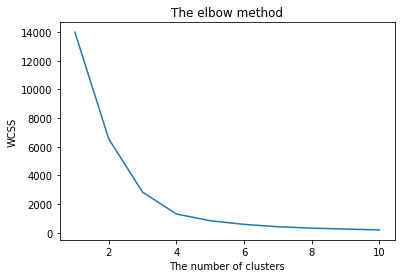

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init = 'k-means++',random_state=42)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5, init='k-means++',random_state=42)
X1['cluster']=kmeans.fit_predict(X1) 

In [ ]:
X1.head(25)

,lat,lng,restaurant,others,cluster
0,12.923086,77.556032,33,30,0
1,12.924439,77.564848,35,31,0
2,12.928059,77.556010,22,6,2
3,12.925808,77.564340,31,30,0
4,12.926261,77.564343,49,28,4
5,12.924890,77.564926,50,16,4
6,12.926094,77.550367,52,21,4
8,12.924022,77.564215,34,30,0
9,12.924468,77.565019,26,4,2
10,12.922878,77.556389,35,30,0


In [ ]:
closest = kmeans.cluster_centers_
X1["centroids"] = 0
for i in range(len(closest)):
    X1["centroids"].iloc[i] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
X1[X1['centroids']==1]

,lat,lng,restaurant,others,cluster,centroids
0,12.923086,77.556032,33,30,0,1
1,12.924439,77.564848,35,31,0,1
2,12.928059,77.556010,22,6,2,1
3,12.925808,77.564340,31,30,0,1
4,12.926261,77.564343,49,28,4,1


In [ ]:
X1['venue.location.formattedAddress'] = dataframe['venue.location.address']
X1.head()

,lat,lng,restaurant,others,cluster,centroids,venue.location.formattedAddress
0,12.923086,77.556032,33,30,0,1,"293, Banashankari 3rd Stage"
1,12.924439,77.564848,35,31,0,1,Opp. BDA Complex
2,12.928059,77.556010,22,6,2,1,Opp. Chennamanakere Bus Stand
3,12.925808,77.564340,31,30,0,1,"#31,21st Main Rd, Banashankari"
4,12.926261,77.564343,49,28,4,1,"Sri Sai Plaza, No. 97, 22nd Main Rd, BSK 2nd S..."


Folium to plot the clusters on a map

In [ ]:
import folium
m = folium.Map(location=[12, -122.6750])

In [ ]:
city = "Bangalore"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, lng]:", location)

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
[lat, lng]: [12.9791198, 77.5912997]


#Plotting the Clusters on a geographical location

In [ ]:
import sklearn.preprocessing
import folium
x, y = "lat", "lng"
color = "cluster"
size = "restaurant"
popup = "venue.location.formattedAddress"
marker = "centroids"
data = X1.copy()
## create color column
lst_elements = sorted(list(X1[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])
## create size column (scaled)
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)
## initialize the map with the starting location
map_ = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)
## add points
data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"], fill=True,popup=row[popup],
           radius=row["size"]).add_to(map_), axis=1)
## add html legend
legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
map_.get_root().html.add_child(folium.Element(legend_html))
## add centroids marker
lst_elements = sorted(list(X1[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], 
           draggable=False,  popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(map_), axis=1)
## plot the map
map_